# PRICE ELASTICITY

## BUSINESS PROBLEM

A company intends to change the prices of the products it sells, but is concerned that this alteration might impact the demand for these products and consequently affect revenue. As a data analyst/scientist, you need to determine price elasticity using scientific methodology based on the data from the prices of the products sold by the company.

## SOLUCTION PLANNING

The price charged for products can affect the demand for those products. By using the price elasticity technique, we can predict the price-demand behavior and evaluate how far we can stretch the value.

Identify the relationship between price and demand as elastic, inelastic, or unitary. Utilize regression algorithms to calculate price elasticity.

# 1.0 - IMPORTS

## 1.2 - LIBRARIES

In [1]:
import pandas                   as pd
import numpy                    as np
import inflection
import seaborn                  as sns
import matplotlib.pyplot        as plt
import statsmodels.api          as sm

## 1.3 - LOAD DATA

In [2]:
df_raw = pd.read_csv('../dataset/price_elasticity.csv', low_memory=True)

## 1.4 - HELPER FUNCTIONS

### 1.4.1 - PLOT LAYOUT

In [56]:
sns.set_theme(rc = {'figure.figsize':(13,5)})

# 2.0 - DATA DESCRIPTION

In [4]:
df2 = df_raw.copy()

## 2.1 - DATA DIMENSIONS

In [5]:
print('Total of Columns: {}'.format(df2.shape[1]))
print('Total of Rows: {}'.format(df2.shape[0]))
print('\nTotal of unique features: \n{}'.format(df2.apply(lambda x: x.nunique())))


Total of Columns: 32
Total of Rows: 23151

Total of unique features: 
Unnamed: 0         23151
Date_imp            1286
Date_imp_d           188
Cluster               58
Category_name         58
name                 908
price               3023
disc_price          3174
merchant               7
condition              1
Disc_percentage       68
isSale                 2
Imp_count             29
brand                266
p_description        908
currency               1
dateAdded            872
dateSeen            4373
dateUpdated          819
imageURLs              4
manufacturer         235
shipping              68
sourceURLs          3922
weight               639
Date_imp_d.1         188
Day_n                  7
month                 11
month_n               11
day                   31
Week_Number           42
Zscore_1            6018
price_std           1792
dtype: int64


## 2.2 - RENAME COLUMNS

In [6]:
df2.columns

Index(['Unnamed: 0', 'Date_imp', 'Date_imp_d', 'Cluster', 'Category_name',
       'name', 'price', 'disc_price', 'merchant', 'condition',
       'Disc_percentage', 'isSale', 'Imp_count', 'brand', 'p_description',
       'currency', 'dateAdded', 'dateSeen', 'dateUpdated', 'imageURLs',
       'manufacturer', 'shipping', 'sourceURLs', 'weight', 'Date_imp_d.1',
       'Day_n', 'month', 'month_n', 'day', 'Week_Number', 'Zscore_1',
       'price_std'],
      dtype='object')

In [7]:
old_columns = df2.columns
snakecase = lambda x: inflection.underscore(x)
new_columns = list(map(snakecase, old_columns))
df2.columns = new_columns
df2.columns

Index(['unnamed: 0', 'date_imp', 'date_imp_d', 'cluster', 'category_name',
       'name', 'price', 'disc_price', 'merchant', 'condition',
       'disc_percentage', 'is_sale', 'imp_count', 'brand', 'p_description',
       'currency', 'date_added', 'date_seen', 'date_updated', 'image_ur_ls',
       'manufacturer', 'shipping', 'source_ur_ls', 'weight', 'date_imp_d.1',
       'day_n', 'month', 'month_n', 'day', 'week_number', 'zscore_1',
       'price_std'],
      dtype='object')

## 2.3 - DROP EXTRA COLUMNS

In [8]:
df2 = df2.drop(columns = ['unnamed: 0', 'date_imp', 'cluster', 'price', 'condition', 'disc_percentage', 
                          'is_sale', 'imp_count', 'p_description', 'currency', 'date_added', 'date_seen', 
                          'date_updated', 'image_ur_ls', 'manufacturer', 'shipping', 'source_ur_ls', 'weight', 
                          'date_imp_d.1', 'zscore_1', 'price_std'], axis = 1)
print('Columns deleted: {}'.format(df_raw.shape[1] - df2.shape[1]))

Columns deleted: 21


### 2.3.1 - RENAME COLUMNS

In [9]:
df2 = df2.rename(columns={'date_imp_d': 'date', 'day_n': 'day_week', 'month': 'month_number','month_n': 'month'})

## 2.4 - DATA TYPES

In [10]:
df2.dtypes

date              object
category_name     object
name              object
disc_price       float64
merchant          object
brand             object
day_week          object
month_number       int64
month             object
day                int64
week_number        int64
dtype: object

In [11]:
df2['date'] = pd.to_datetime(df2['date'] )


## 2.5 - NAN VOLUMETRY

In [12]:
df2.isna().sum()

date             0
category_name    0
name             0
disc_price       0
merchant         0
brand            0
day_week         0
month_number     0
month            0
day              0
week_number      0
dtype: int64

# 3.0 - DESCRIPTIVE STATISTIC

In [13]:
df3 =  df2.copy()

In [14]:
numerical = df3.select_dtypes(include=['int', 'float'])

In [15]:
# Tendence central:
# - Mean
# - Median

central_tendence1 = pd.DataFrame(numerical.apply(lambda x: np.mean(x))).T
central_tendence2 = pd.DataFrame(numerical.apply(lambda x: np.median(x))).T

# Dispersion:
# - Max
# - Min
# - Range
# - Standart Deviation
# - Skew
# - Kurtosis

dispersion1 = pd.DataFrame(numerical.apply(lambda x: np.std(x))).T
dispersion2 = pd.DataFrame(numerical.apply(min)).T
dispersion3 = pd.DataFrame(numerical.apply(max)).T
dispersion4 = pd.DataFrame(numerical.apply(lambda x: x.min() - x.max())).T
dispersion5 = pd.DataFrame(numerical.apply(lambda x: x.skew())).T
dispersion6 = pd.DataFrame(numerical.apply(lambda x: x.kurtosis())).T

# Concatenating the dataframes

metrics = pd.concat([central_tendence1, central_tendence2, dispersion1, dispersion2, dispersion3, dispersion4, dispersion5, dispersion6]).T.reset_index()
metrics.columns = ['attribuites', 'mean', 'median', 'standart deviation', 'min', 'max', 'range', 'skew', 'kurtosis']
metrics

,attribuites,mean,median,standart deviation,min,max,range,skew,kurtosis
0,disc_price,494.104295,199.0,808.571509,1.0,10879.95,-10878.95,4.748349,39.612839
1,month_number,7.651030,8.0,2.592787,1.0,12.00,-11.00,-0.099417,-0.628859
2,day,15.693879,16.0,9.681413,1.0,31.00,-30.00,0.032258,-1.331838
3,week_number,31.342750,32.0,11.316253,1.0,51.00,-50.00,-0.266980,-0.648027


# 4.0 - HYPOTHESIS MIND MAP

# 5.0 - EXPLORATORY DATA ANALYSIS

In [16]:
df5 = df3.copy()

## NUMBER OF STORES ANALYZED

In [17]:
print('Total of stores {}'.format(df5['merchant'].nunique()))

Total of stores 7


## NUMBER OF BRANDS ANALYZED

In [18]:
print('Total of brand: {}'.format(df5['brand'].nunique()))

Total of brand: 266


## VOLUME OF BRANDS BY STORE

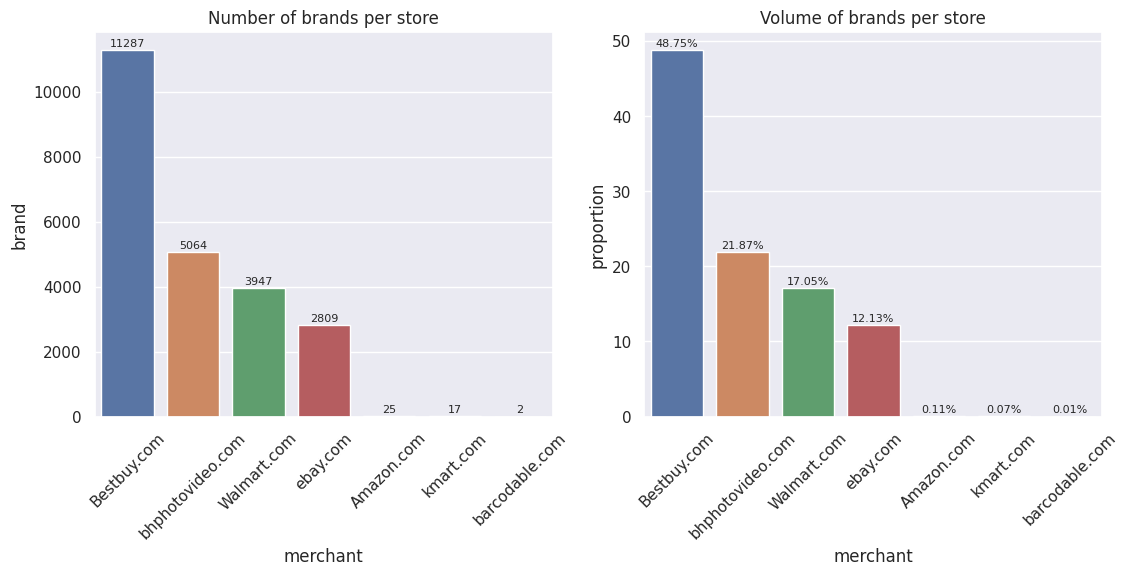

In [19]:
plt.subplot(1,2,1)
aux = df5[['merchant', 'brand']].groupby('merchant').count().reset_index().sort_values(by='brand', ascending=False)
plot = sns.barplot(data = aux, x = 'merchant', y = 'brand', hue = 'merchant')
plt.title('Number of brands per store')
plt.xticks(rotation= 45)
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)
    
plt.subplot(1,2,2)
df_aux_perc = pd.DataFrame(df5['merchant'].value_counts(normalize=True)*100).reset_index()
plot2 = sns.barplot(data = df_aux_perc, x = 'merchant', y = 'proportion', hue = 'merchant')
plt.title('Volume of brands per store')
plt.xticks(rotation= 45)
for p in plot2.patches:
    height = p.get_height()
    plot2.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)
plt.show()

## BEST SELLING CATEGORIES

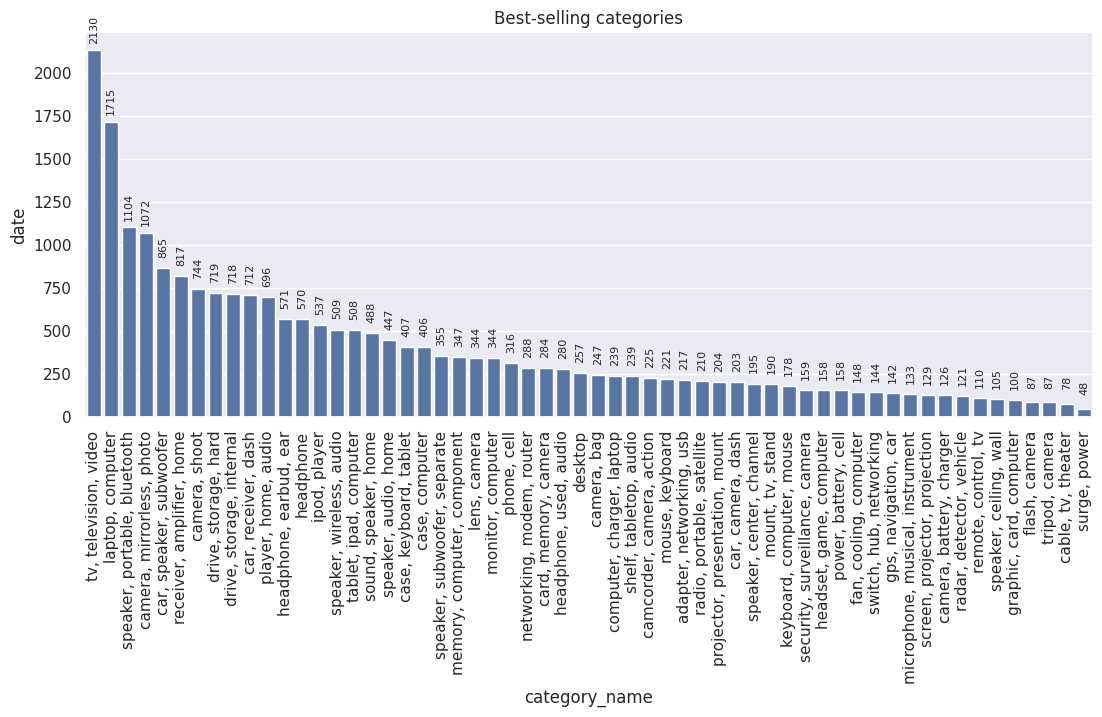

In [20]:
aux = df5[['date', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date', ascending=False)
plot = sns.barplot(data = aux, x = 'category_name', y = 'date')
plt.title('Best-selling categories')
plt.xticks(rotation= 90)
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 15), textcoords='offset points', fontsize=8, rotation='vertical')
plt.show()

## TOP 10 BEST SELLING BRANDS BY STORE

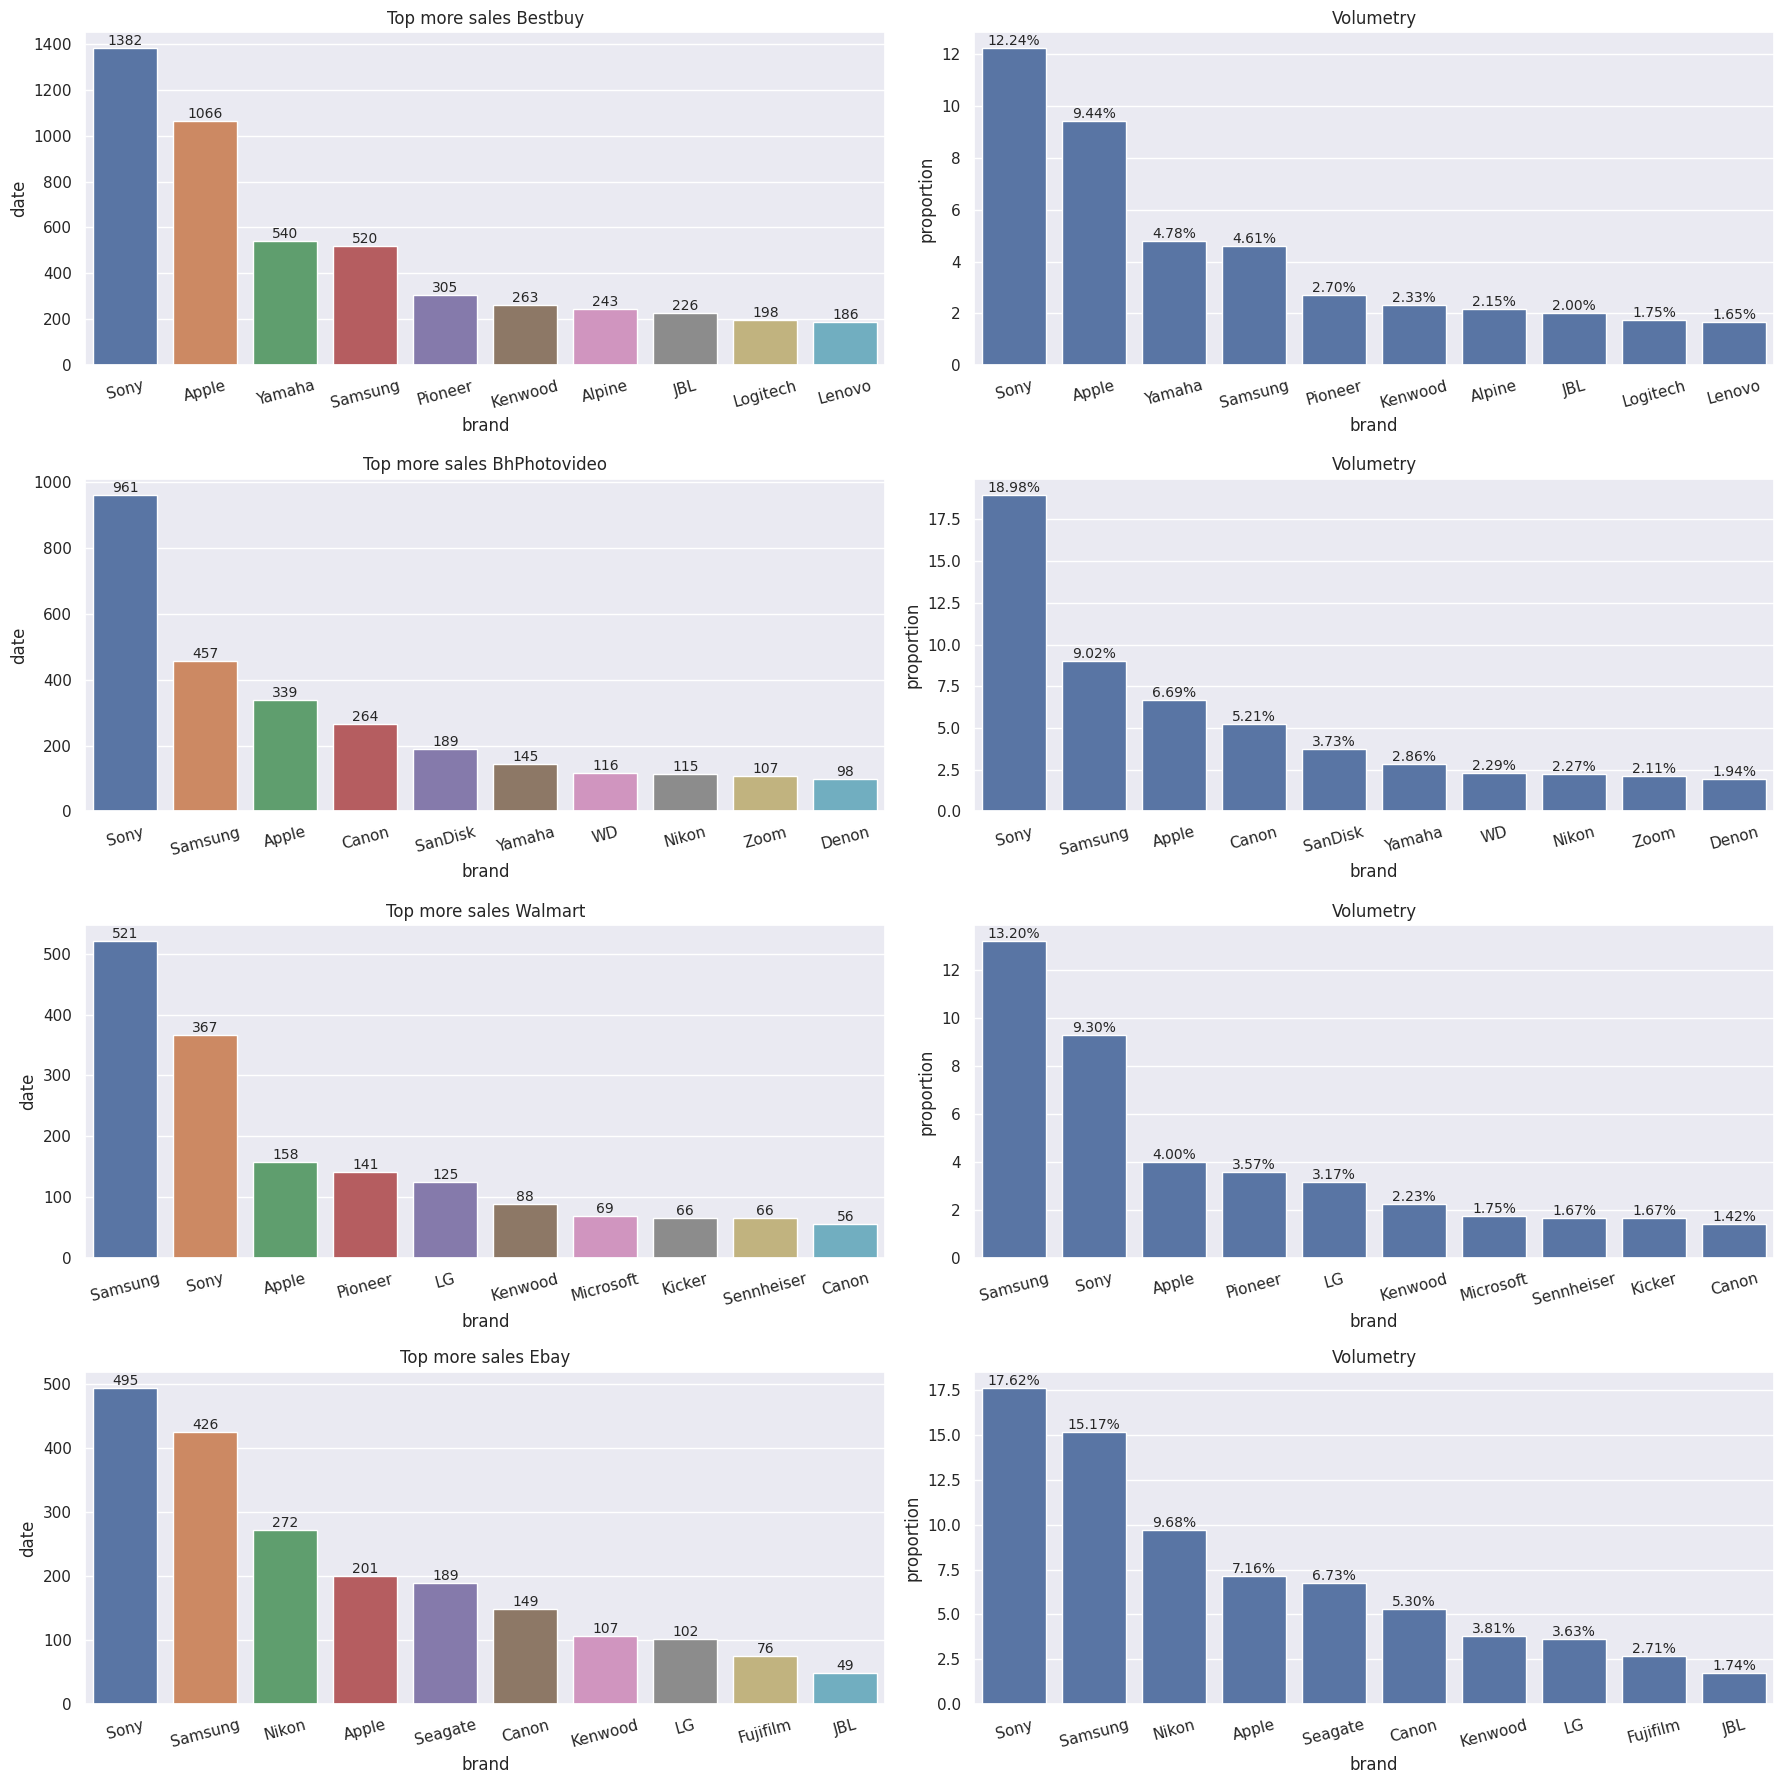

In [21]:
bestbuy = df5.loc[df5['merchant'] == 'Bestbuy.com']
bhp     = df5.loc[df5['merchant'] == 'bhphotovideo.com']
Walmart = df5.loc[df5['merchant'] == 'Walmart.com']
ebay    = df5.loc[df5['merchant'] == 'ebay.com']

plt.figure(figsize=(18,18))
plt.subplot(4,2,1)
aux1 = bestbuy[['date', 'brand']].groupby('brand').count().reset_index().sort_values('date', ascending = False)
plot = sns.barplot(data = aux1.head(10), x = 'brand', y = 'date', hue = 'brand')
plt.title('Top more sales Bestbuy')
plt.xticks(rotation= 15)
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)
    
plt.subplot(4,2,2)
aux2 = pd.DataFrame(bestbuy['brand'].value_counts(normalize=True)*100).reset_index()
plot2 = sns.barplot(data = aux2.head(10).sort_values('proportion', ascending=False), x = 'brand', y = 'proportion')
plt.title('Volumetry')
plt.xticks(rotation= 15)
for p in plot2.patches:
    height = p.get_height()
    plot2.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)
    
plt.subplot(4,2,3)
aux3 = bhp[['date', 'brand']].groupby('brand').count().reset_index().sort_values('date', ascending = False)
plot3 = sns.barplot(data = aux3.head(10), x = 'brand', y = 'date', hue = 'brand')
plt.title('Top more sales BhPhotovideo')
plt.xticks(rotation= 15)
for p in plot3.patches:
    plot3.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)
    
plt.subplot(4,2,4)
aux4 = pd.DataFrame(bhp['brand'].value_counts(normalize=True)*100).reset_index()
plot4 = sns.barplot(data = aux4.head(10).sort_values('proportion', ascending=False), x = 'brand', y = 'proportion')
plt.title('Volumetry')
plt.xticks(rotation= 15)
for p in plot4.patches:
    height = p.get_height()
    plot4.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)
    
plt.subplot(4,2,5)
aux5 = Walmart[['date', 'brand']].groupby('brand').count().reset_index().sort_values('date', ascending = False)
plot5 = sns.barplot(data = aux5.head(10), x = 'brand', y = 'date', hue = 'brand')
plt.title('Top more sales Walmart')
plt.xticks(rotation= 15)
for p in plot5.patches:
    plot5.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)
    
plt.subplot(4,2,6)
aux6 = pd.DataFrame(Walmart['brand'].value_counts(normalize=True)*100).reset_index()
plot6 = sns.barplot(data = aux6.head(10).sort_values('proportion', ascending=False), x = 'brand', y = 'proportion')
plt.title('Volumetry')
plt.xticks(rotation= 15)
for p in plot6.patches:
    height = p.get_height()
    plot6.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)
    
plt.subplot(4,2,7)
aux7 = ebay[['date', 'brand']].groupby('brand').count().reset_index().sort_values('date', ascending = False)
plot7 = sns.barplot(data = aux7.head(10), x = 'brand', y = 'date', hue = 'brand')
plt.title('Top more sales Ebay')
plt.xticks(rotation= 15)
for p in plot7.patches:
    plot7.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)
    
plt.subplot(4,2,8)
aux8 = pd.DataFrame(ebay['brand'].value_counts(normalize=True)*100).reset_index()
plot8 = sns.barplot(data = aux8.head(10).sort_values('proportion', ascending=False), x = 'brand', y = 'proportion')
plt.title('Volumetry')
plt.xticks(rotation= 15)
for p in plot8.patches:
    height = p.get_height()
    plot8.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

## STORES SALES VOLUME BY DAY OF WEEK AND YEAR 

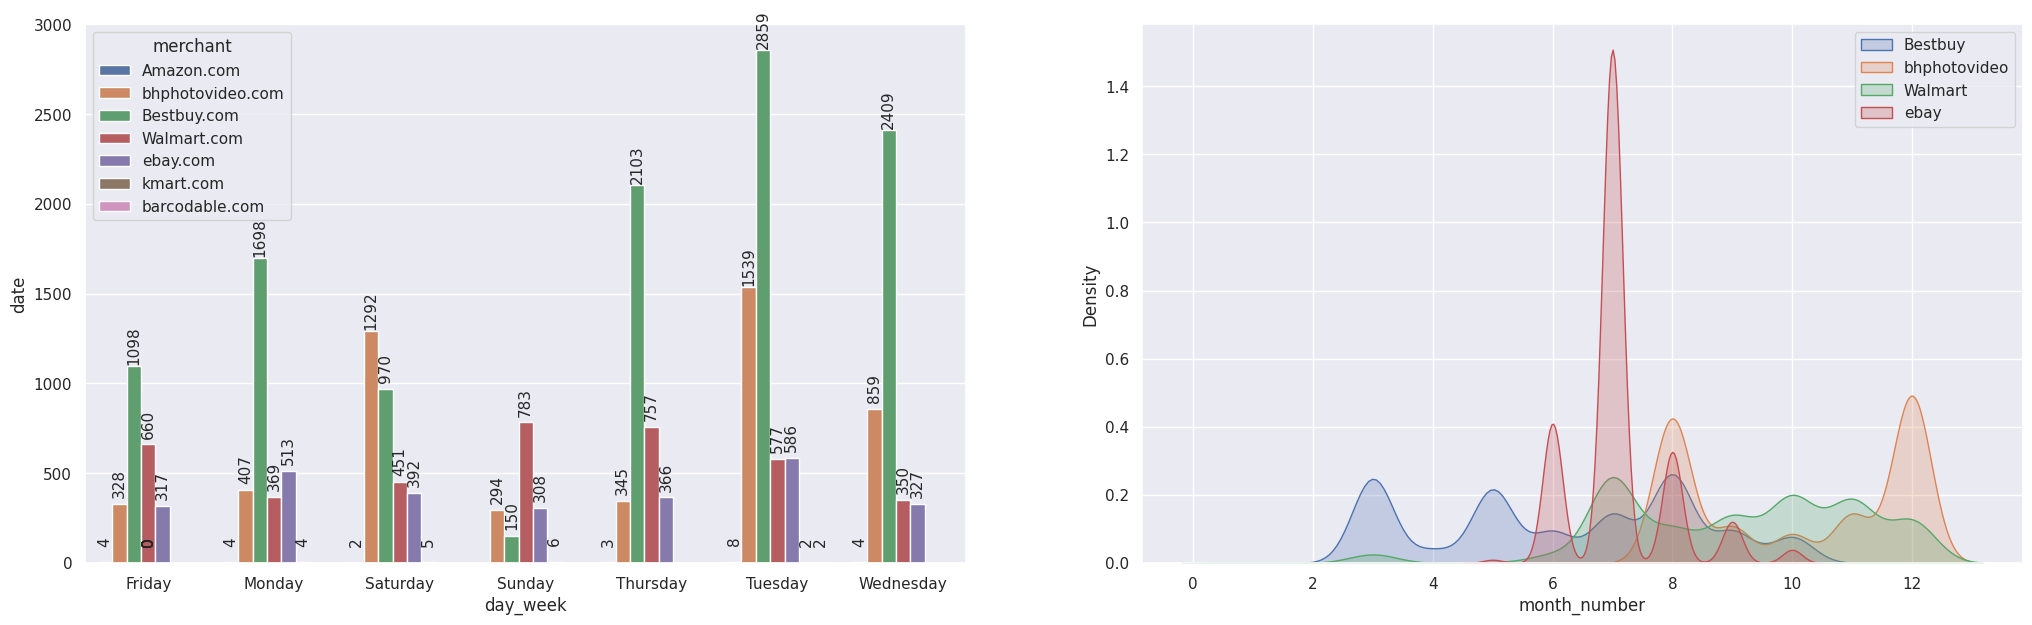

In [22]:
plt.figure(figsize=(25,7))

plt.subplot(1,2,1)
aux = df5.groupby(['merchant', 'day_week']).count().reset_index().sort_values(by = 'day_week', ascending = True)
plot = sns.barplot(data = aux, x = 'day_week', y = 'date', hue = 'merchant')
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 15), textcoords='offset points', fontsize=11, rotation='vertical')

plt.subplot(1,2,2)
sns.kdeplot(df5[df5['merchant'] == 'Bestbuy.com']['month_number'], fill=True,label='Bestbuy')
plt.subplot(1,2,2)
sns.kdeplot(df5[df5['merchant'] == 'bhphotovideo.com']['month_number'], fill=True,label='bhphotovideo')
plt.subplot(1,2,2)
sns.kdeplot(df5[df5['merchant'] == 'Walmart.com']['month_number'], fill=True,label='Walmart')
plt.subplot(1,2,2)
sns.kdeplot(df5[df5['merchant'] == 'ebay.com']['month_number'], fill=True,label='ebay')
plt.legend()
plt.show()

## TOTAL OF SALES BY WEEK

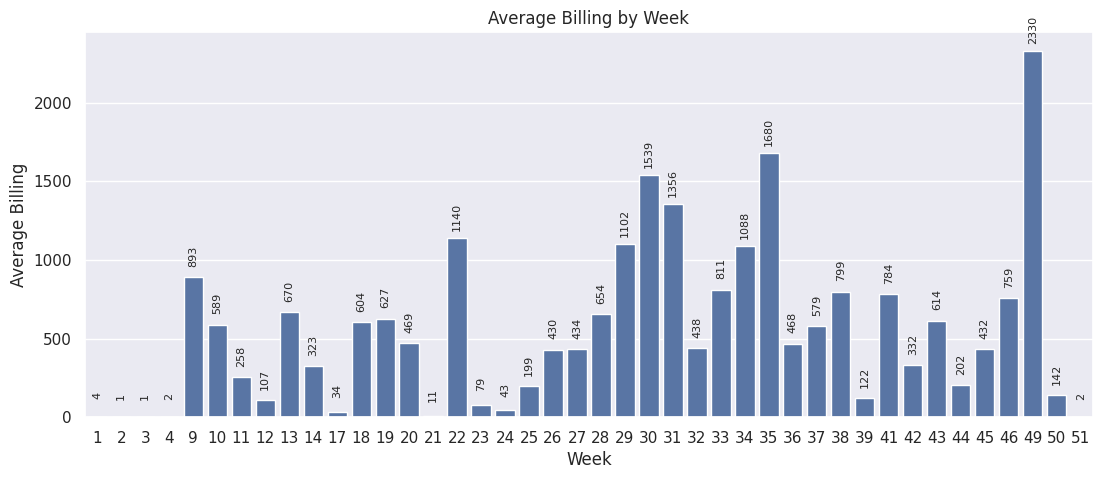

In [23]:
aux1 = df5.groupby('week_number').count().reset_index()
plot = sns.barplot(data=aux1, x='week_number', y='date')
plt.title('Average Billing by Week')
plt.xlabel('Week')
plt.ylabel('Average Billing')

for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 15), textcoords='offset points', fontsize=8, rotation = 'vertical')

plt.show()

## AVERAGE BILLING BY DAY OF WEEK

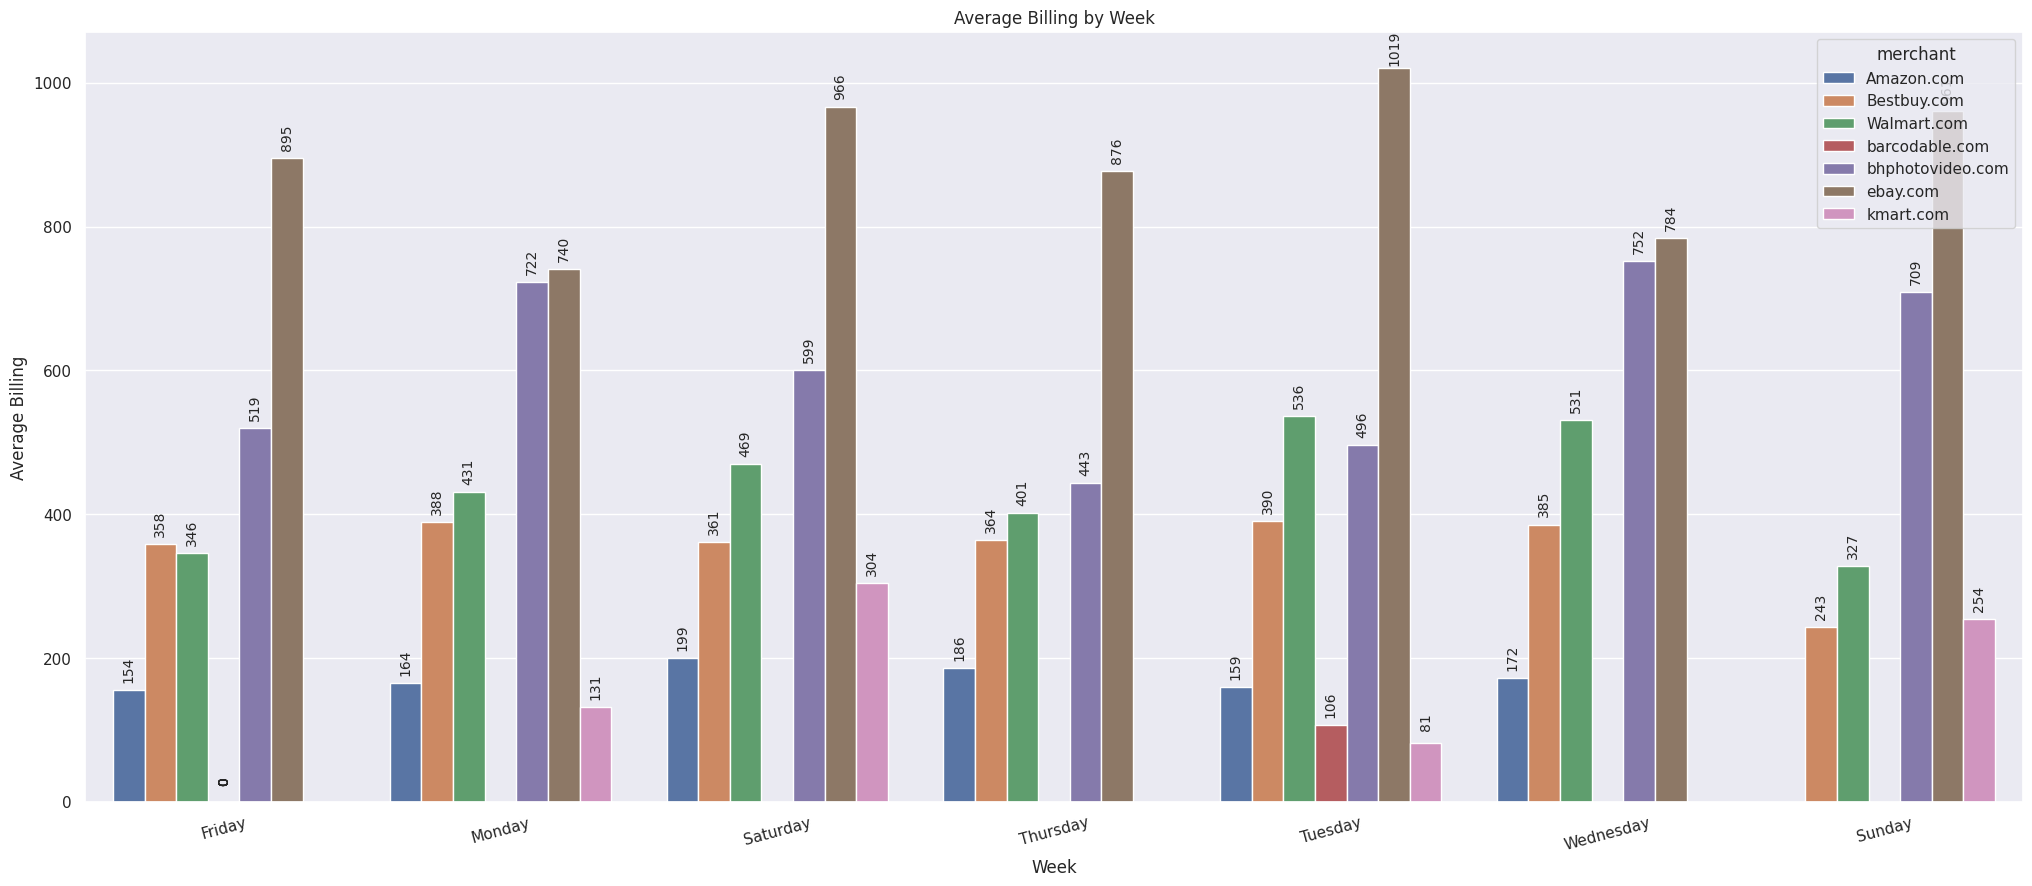

In [24]:
plt.figure(figsize=(25, 10))

aux1 = df5.groupby(['merchant', 'day_week'])['disc_price'].mean().reset_index()
plot = sns.barplot(data=aux1, x='day_week', y='disc_price', hue='merchant')
plt.title('Average Billing by Week')
plt.xlabel('Week')
plt.ylabel('Average Billing')
plt.xticks(rotation=15)
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 15), textcoords='offset points', fontsize=10, rotation = 'vertical')

plt.show()


## AVERAGE BILLING BY YEAR

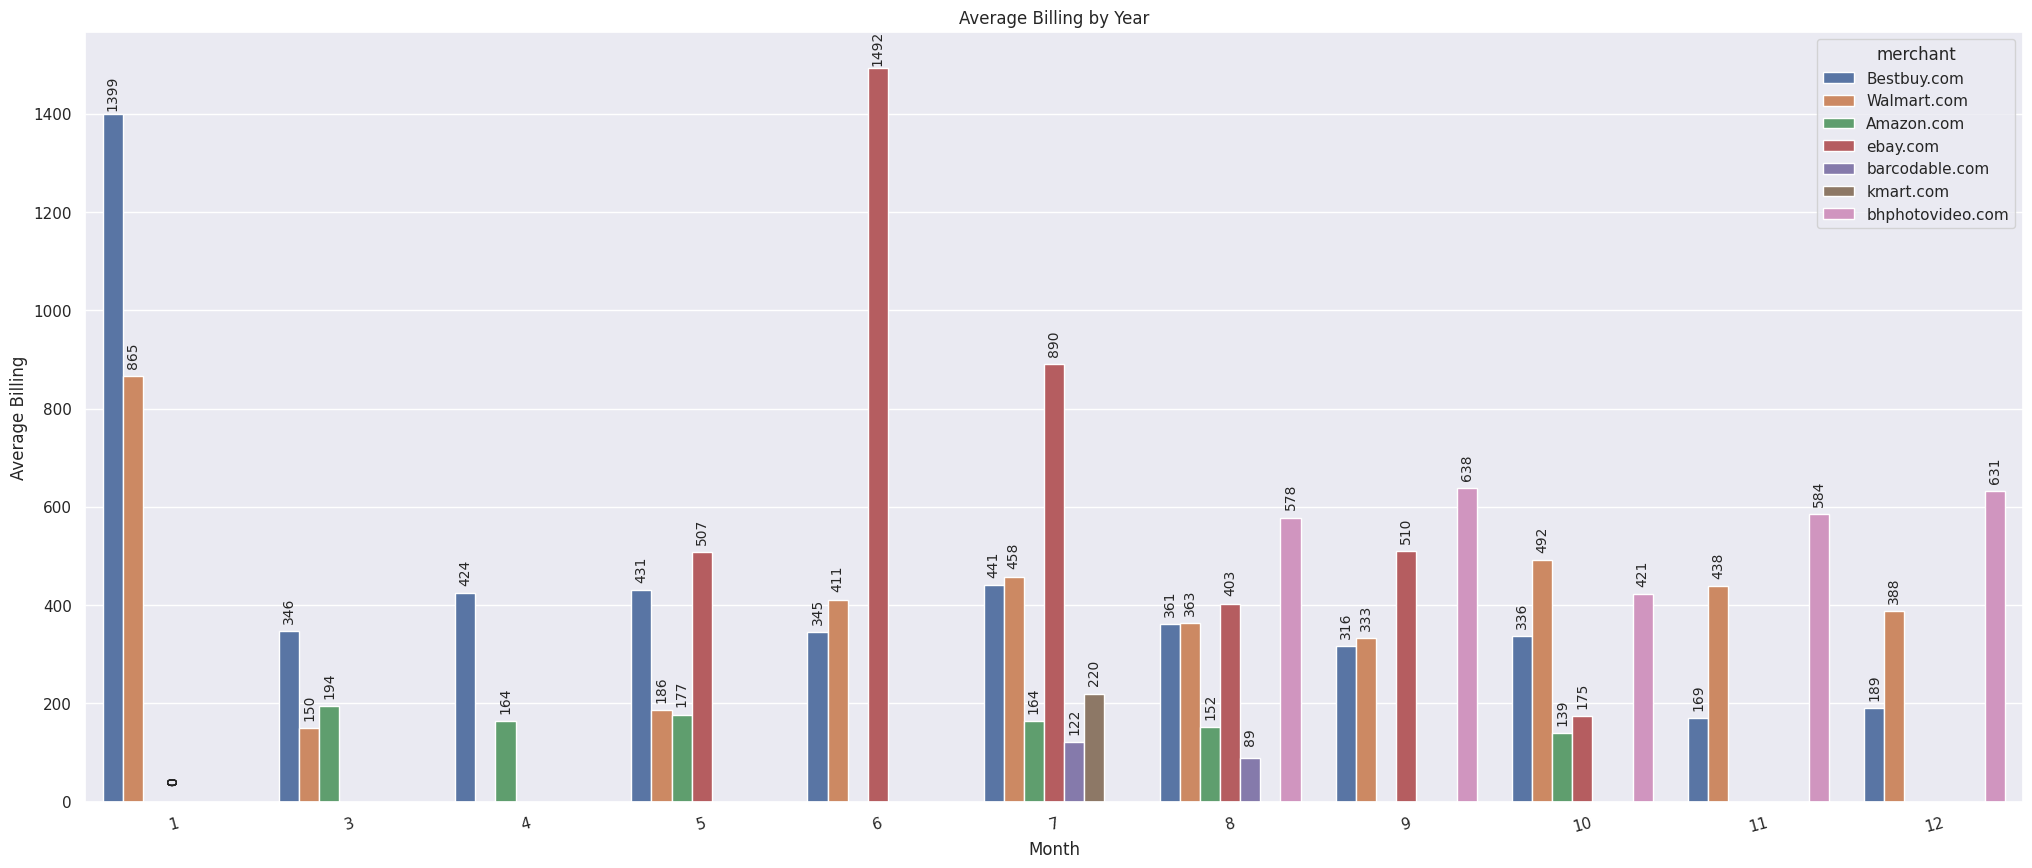

In [25]:
plt.figure(figsize=(25, 10))

aux1 = df5.groupby(['merchant', 'month_number'])['disc_price'].mean().reset_index()
plot = sns.barplot(data=aux1, x='month_number', y='disc_price', hue='merchant')
plt.title('Average Billing by Year')
plt.xlabel('Month')
plt.ylabel('Average Billing')
plt.xticks(rotation=15)
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 15), textcoords='offset points', fontsize=10, rotation = 'vertical')

plt.show()

# 6.0 - DATA PREPARATION

In [26]:
df6 = df5.copy()

## 6.1 - FEATURE SELECTION

In [27]:
df_category = bestbuy[bestbuy['category_name'] == 'laptop, computer']

Criando dataframe que ira conter a demanda por semana. Logo selecionaremos a media de preços da categoria e faremos a contagem por venda.

In [28]:
df_aux = df_category.groupby(['name', 'week_number']).agg({'disc_price': 'mean', 'date': 'count'}).reset_index()
df_aux.head()

,name,week_number,disc_price,date
0,"12 MacBook (Mid 2017, Gold)",30,1599.99,1
1,"12 MacBook (Mid 2017, Gold)",31,1551.99,8
2,"12 MacBook (Mid 2017, Gold)",33,1454.99,2
3,"12 MacBook (Mid 2017, Gold)",34,1551.99,2
4,"12 MacBook (Mid 2017, Gold)",35,1474.49,4


Processo para transformar cada linha do dataframe em uma feature com o preço

In [29]:
x_price = df_aux.pivot(index = 'week_number', columns = 'name', values = 'disc_price')
x_price = pd.DataFrame(x_price.to_records())
x_price.head()

,week_number,"12 MacBook (Mid 2017, Gold)","12 MacBook (Mid 2017, Silver)",12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,"13.3 MacBook Air (Mid 2017, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",Acer 15.6 Chromebook CB5-571-C4G4,...,"HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"""
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,NaN,NaN,426.495,NaN,2799.99,2599.99,NaN,899.99,236.495,...,799.99,499.99,NaN,664.99,379.99,316.99,NaN,807.49,NaN,617.49
2,10,NaN,NaN,426.495,NaN,2799.99,2599.99,NaN,899.99,238.995,...,819.99,429.99,229.99,664.99,474.99,335.99,NaN,949.99,NaN,617.49
3,11,NaN,NaN,NaN,NaN,2715.99,2482.99,NaN,NaN,NaN,...,819.99,NaN,218.49,NaN,474.99,383.99,NaN,NaN,NaN,569.99
4,13,NaN,NaN,449.000,NaN,2547.99,2353.99,NaN,849.99,223.995,...,819.99,499.99,203.49,636.99,444.99,369.99,2399.99,909.99,NaN,591.49


Processo para transformar cada linha do dataframe em uma feature com a demanda

In [30]:
y_demand = df_aux.pivot(index = 'week_number', columns = 'name', values = 'date')
y_demand = pd.DataFrame(y_demand.to_records())
y_demand.head()

,week_number,"12 MacBook (Mid 2017, Gold)","12 MacBook (Mid 2017, Silver)",12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,"13.3 MacBook Air (Mid 2017, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",Acer 15.6 Chromebook CB5-571-C4G4,...,"HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"""
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,NaN,NaN,4.0,NaN,3.0,6.0,NaN,2.0,4.0,...,1.0,2.0,NaN,4.0,4.0,4.0,NaN,4.0,NaN,2.0
2,10,NaN,NaN,2.0,NaN,1.0,4.0,NaN,1.0,2.0,...,1.0,1.0,1.0,2.0,2.0,2.0,NaN,2.0,NaN,2.0
3,11,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,NaN,...,1.0,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,2.0
4,13,NaN,NaN,1.0,NaN,2.0,8.0,NaN,1.0,2.0,...,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,NaN,2.0


## 6.2 - DATA DIMENSION

In [31]:
print('Number of row of dataframe price: {}'.format(x_price.shape[0]))
print('Number of columns of dataframe price: {}'.format(x_price.shape[1]))
print('\n-----------------------------------------\n')
print('Number of row of dataframe demand: {}'.format(y_demand.shape[0]))
print('Number of columns of dataframe demand: {}'.format(y_demand.shape[1]))

Number of row of dataframe price: 26
Number of columns of dataframe price: 40

-----------------------------------------

Number of row of dataframe demand: 26
Number of columns of dataframe demand: 40


## 6.3 - DATA TYPES

In [32]:
x_price.dtypes

week_number                                                                                                                                                                                              int64
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            float64
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          float64
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           float64
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                         

In [33]:
y_demand.dtypes

week_number                                                                                                                                                                                              int64
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            float64
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          float64
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           float64
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                         

## 6.4 - NA VOLUMETRY

In [34]:
x_price.isna().sum()

week_number                                                                                                                                                                                             0
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            17
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          18
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           13
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                                             

In [35]:
y_demand.isna().sum()

week_number                                                                                                                                                                                             0
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            17
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          18
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           13
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                                             

### 6.4.1 - FILL NA

Para a substituição do NAN será utilizada a mediana dos preços para a base x_price, pois assim manteremos um range tangivel e uma coerência para os dados, ja que se inserirmos 0 para linhas que não obtivemos vendas, iremos asusmir que o produto tem preço nulo, logo seria um outlier na implementação do modelo de regressão para calcular a elasticidade

In [36]:
fill_value = np.round(x_price.median(), 2)
x_price.fillna(fill_value, inplace = True)
x_price.head()

,week_number,"12 MacBook (Mid 2017, Gold)","12 MacBook (Mid 2017, Silver)",12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,"13.3 MacBook Air (Mid 2017, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",Acer 15.6 Chromebook CB5-571-C4G4,...,"HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"""
0,4,1551.99,1299.99,415.500,949.99,2618.99,2353.99,304.99,829.99,249.000,...,819.99,463.74,218.49,601.49,415.99,337.49,2399.99,853.74,4179.99,610.99
1,9,1551.99,1299.99,426.495,949.99,2799.99,2599.99,304.99,899.99,236.495,...,799.99,499.99,218.49,664.99,379.99,316.99,2399.99,807.49,4179.99,617.49
2,10,1551.99,1299.99,426.495,949.99,2799.99,2599.99,304.99,899.99,238.995,...,819.99,429.99,229.99,664.99,474.99,335.99,2399.99,949.99,4179.99,617.49
3,11,1551.99,1299.99,415.500,949.99,2715.99,2482.99,304.99,829.99,249.000,...,819.99,463.74,218.49,601.49,474.99,383.99,2399.99,853.74,4179.99,569.99
4,13,1551.99,1299.99,449.000,949.99,2547.99,2353.99,304.99,849.99,223.995,...,819.99,499.99,203.49,636.99,444.99,369.99,2399.99,909.99,4179.99,591.49


Para a substituição de NAN para a base de demanda, iremos assumir que o valor que falta em cada linha foi uma transação que não ocorreu naquele dia. Logo se não ha dados, assumiremos que a venda é 0 pois não ocorreu.

In [37]:
y_demand.fillna(0, inplace = True)
y_demand.head()

,week_number,"12 MacBook (Mid 2017, Gold)","12 MacBook (Mid 2017, Silver)",12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,"13.3 MacBook Air (Mid 2017, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",Acer 15.6 Chromebook CB5-571-C4G4,...,"HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"""
0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0.0,0.0,4.0,0.0,3.0,6.0,0.0,2.0,4.0,...,1.0,2.0,0.0,4.0,4.0,4.0,0.0,4.0,0.0,2.0
2,10,0.0,0.0,2.0,0.0,1.0,4.0,0.0,1.0,2.0,...,1.0,1.0,1.0,2.0,2.0,2.0,0.0,2.0,0.0,2.0
3,11,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,2.0
4,13,0.0,0.0,1.0,0.0,2.0,8.0,0.0,1.0,2.0,...,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0


# 7.0 - MACHINE LEARNING MODEL    

## 7.1 - UNITARY TEST

In [38]:
#select test train
x_product = x_price['12 MacBook (Mid 2017, Gold)']
y_product = y_demand['12 MacBook (Mid 2017, Gold)']

X = sm.add_constant(x_product)

#model definition
model = sm.OLS(y_product, X)

#model training
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:     12 MacBook (Mid 2017, Gold)   R-squared:                       0.081
Model:                                     OLS   Adj. R-squared:                  0.042
Method:                          Least Squares   F-statistic:                     2.108
Date:                         Tue, 21 May 2024   Prob (F-statistic):              0.159
Time:                                 16:43:54   Log-Likelihood:                -50.564
No. Observations:                           26   AIC:                             105.1
Df Residuals:                               24   BIC:                             107.6
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

## 7.2 - FULL TEST BASE

In [39]:
result_product = {
    'name': [],
    'price_elasticity': [],
    'price_mean': [],
    'quantity_mean': [],
    'intercept': [],
    'slope': [],
    'rsquared': [],
    'p_value': []
}

for column in x_price.columns[1:]:
    column_points = []
    for i in range(len(x_price[column])):
        column_points.append((x_price[column][i], y_demand[column][i]))
    df = pd.DataFrame(list(column_points), columns=['x_price', 'y_demand'])

    x_product = df['x_price']
    y_product = df['y_demand']

    X = sm.add_constant(x_product)
    model = sm.OLS(y_product, X)
    result = model.fit()

    if result.f_pvalue < 0.05:
        rsquared = result.rsquared
        p_value = result.f_pvalue
        intercept, slope = result.params
        price_mean = np.mean(x_product)
        quantity_mean = np.mean(y_product)
        price_elasticity = slope * (price_mean / quantity_mean)

        result_product['name'].append(column)
        result_product['price_elasticity'].append(price_elasticity)
        result_product['price_mean'].append(price_mean)
        result_product['quantity_mean'].append(quantity_mean)
        result_product['intercept'].append(intercept)
        result_product['slope'].append(slope)
        result_product['rsquared'].append(rsquared)
        result_product['p_value'].append(p_value)

df_elasticity = pd.DataFrame.from_dict(result_product)

In [40]:
df_elasticity

,name,price_elasticity,price_mean,quantity_mean,intercept,slope,rsquared,p_value
0,"12 MacBook (Mid 2017, Silver)",-65.115595,1295.990000,0.384615,25.429075,-0.019325,0.196027,0.023508
1,ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...,-16.039643,299.720769,0.538462,9.175192,-0.028816,0.281984,0.005251
2,Acer 15.6 Chromebook CB5-571-C4G4,-8.432545,242.479231,0.769231,7.255804,-0.026751,0.161645,0.041743
3,Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...,-6.018642,1224.221154,0.692308,4.859060,-0.003404,0.236464,0.011774
4,Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...,-23.203537,790.759231,1.307692,31.650779,-0.038372,0.327839,0.002237
5,Details About Apple Macbook Air 13.3 Laptop (e...,-68.165723,795.509231,0.384615,26.602201,-0.032957,0.510312,0.000041
6,Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...,-6.049399,209.663077,0.961538,6.778268,-0.027743,0.277667,0.005677


# 8.0 - ELASTICITY

## 8.1 - PLOT

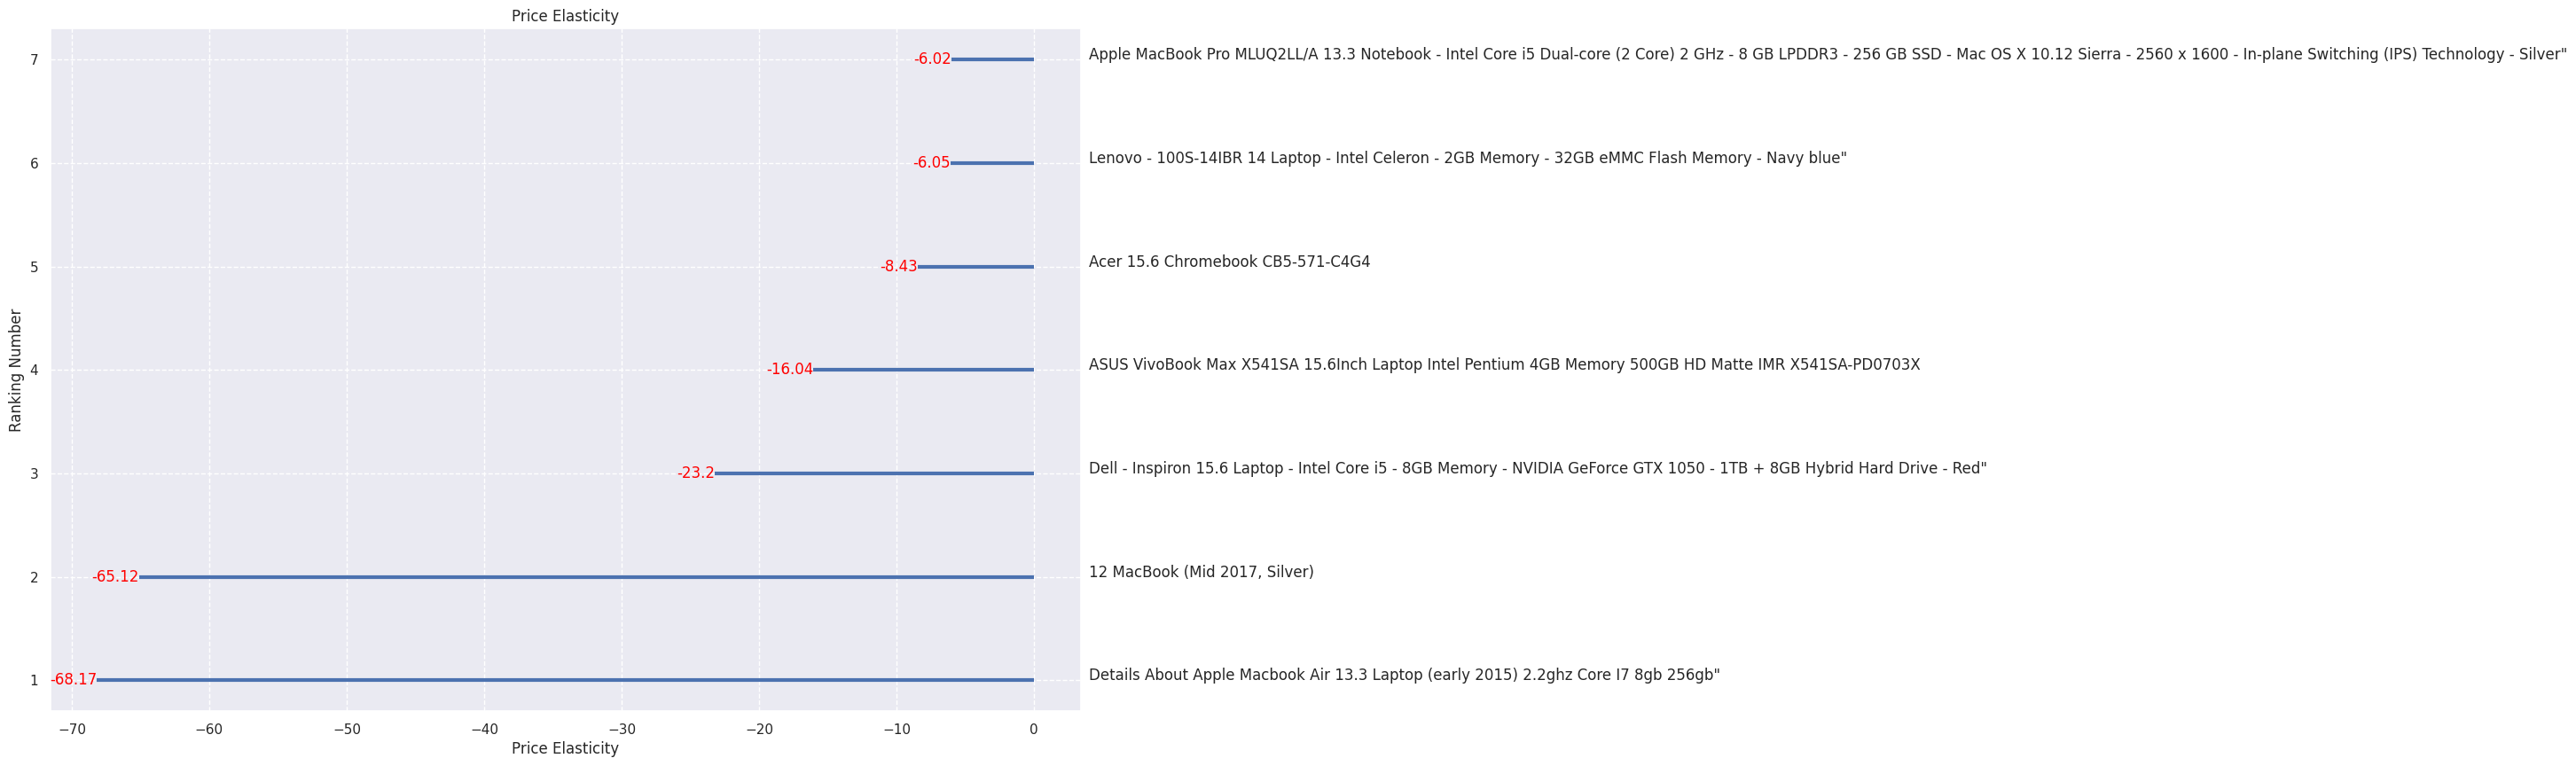

In [55]:
df_elasticity['ranking'] = df_elasticity.loc[:, 'price_elasticity'].rank(ascending = True).astype(int)
df_elasticity_product = df_elasticity.reset_index(drop=True)

plt.figure(figsize = (15,10))
plt.hlines(y = df_elasticity_product['ranking'], 
           xmin = 0, 
           xmax = df_elasticity_product['price_elasticity'], 
           alpha = 1, 
           linewidth = 3)

for name, p in zip(df_elasticity_product['name'], df_elasticity_product['ranking']):
    plt.text(4, p, name)

for x, y, s in zip(df_elasticity_product['price_elasticity'], df_elasticity_product['ranking'], df_elasticity_product['price_elasticity']):
    plt.text(x, y, round(s, 2), horizontalalignment='right' if x < 0 else 'left', 
             verticalalignment='center',
             fontdict={'color': 'red' if x < 0 else 'green', 'size': 12})

plt.gca().set(ylabel = 'Ranking Number', xlabel = 'Price Elasticity')
plt.title('Price Elasticity')
plt.grid(linestyle = '--')


In [42]:
df_order_elasticity = df_elasticity_product[['ranking', 'name', 'price_elasticity']].sort_values(by = 'price_elasticity', ascending = False)
df_order_elasticity

,ranking,name,price_elasticity
3,7,Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...,-6.018642
6,6,Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...,-6.049399
2,5,Acer 15.6 Chromebook CB5-571-C4G4,-8.432545
1,4,ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...,-16.039643
4,3,Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...,-23.203537
0,2,"12 MacBook (Mid 2017, Silver)",-65.115595
5,1,Details About Apple Macbook Air 13.3 Laptop (e...,-68.165723


# 9.0 - BUSINESS PERFORMANCE

In [43]:
billing_result = {
    'name': [],
    'current_billing': [],
    'reduction_billing': [],
    'loss_revenue': [],
    'new_billing': [],
    'billing_variation': [],
    'percentage_change': []
}


for i in range(len(df_order_elasticity)):
    current_avg_price = x_price[df_order_elasticity['name'][i]].mean()

    current_demand = y_demand[df_order_elasticity['name'][i]].sum()

    price_reduction = current_avg_price * 0.9


    increase_demand = -0.1 * df_order_elasticity['price_elasticity'][i]

    new_demand = increase_demand * current_demand

    current_billing = round(current_avg_price * current_demand, 2)

    new_billing = round(price_reduction * new_demand, 2)

    reduction_billing = round(current_billing * 0.9, 2)

    loss_revenue = round(current_billing - reduction_billing, 2)

    billing_variation = round(new_billing - current_billing, 2)

    percentage_change = round((new_billing - current_billing) / current_billing, 2)  

    billing_result['name'].append(df_order_elasticity['name'][i])
    billing_result['current_billing'].append(current_billing)
    billing_result['reduction_billing'].append(reduction_billing)
    billing_result['loss_revenue'].append(loss_revenue)
    billing_result['new_billing'].append(new_billing)
    billing_result['billing_variation'].append(billing_variation)
    billing_result['percentage_change'].append(percentage_change)

df_result = pd.DataFrame(billing_result)
df_result

,name,current_billing,reduction_billing,loss_revenue,new_billing,billing_variation,percentage_change
0,"12 MacBook (Mid 2017, Silver)",12959.90,11663.91,1295.99,75950.24,62990.34,4.86
1,ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...,4196.09,3776.48,419.61,6057.34,1861.25,0.44
2,Acer 15.6 Chromebook CB5-571-C4G4,4849.58,4364.62,484.96,3680.49,-1169.09,-0.24
3,Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...,22035.98,19832.38,2203.60,11936.40,-10099.58,-0.46
4,Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...,26885.81,24197.23,2688.58,56146.14,29260.33,1.09
5,Details About Apple Macbook Air 13.3 Laptop (e...,7955.09,7159.58,795.51,48803.82,40848.73,5.13
6,Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...,5241.58,4717.42,524.16,2853.75,-2387.83,-0.46


In [44]:
df_result.to_csv('../dataset/src/business_performance.csv')

# 10.0 - CROSS PRICE ELASTICITY

In [45]:
def crossprice ( df_x, df_y, column_name):
    import statsmodels.api as sm
    # pegando todos os valores de x_price
    new_df = x_price.copy()
    # peganado os valores y_demand com o mesmo nome da coluna
    new_df['y_value-' + column_name] = y_demand[column_name]

    multi_xvalues =new_df.loc[:, new_df.columns[1:-1]]
    multi_yvalues = new_df.loc[:, new_df.columns[-1]]

    # obter o valor médio do preço do produto
    mean_xvalues = np.mean(multi_xvalues)
    # obter o valor médio da demanda do produto
    mean_yvalues = np.mean(multi_yvalues)


    # regressão linear
    X = sm.add_constant(multi_xvalues)
    model = sm.OLS(multi_yvalues, X, missing='drop')
    result = model.fit()

    #obtendo os resultados
    results_summary = result.summary()
    # p-valores para cada coeficiente
    pvalue = result.pvalues

    # transformando o resultado em uma dataframe
    results_as_html = results_summary.tables[1].as_html()
    new_dataframe = pd.read_html(results_as_html, header=0, index_col=0)[0]

    #adicionando o p-valor ao dataframe
    new_dataframe['p_value'] = pvalue

    #definindo o nome do produto como indice
    new_dataframe.index.name= 'name'
    new_dataframe.reset_index()

    #calculando a elasticidade cruzada
    new_dataframe['mean'] = mean_xvalues
    new_dataframe['price_elasticity'] = round((new_dataframe.coef)*(new_dataframe['mean']/mean_yvalues), 2)

    new_dataframe = new_dataframe.reset_index()
    pvalue_siginicant = new_dataframe['p_value']

    #verificando a hipótese nula(inclinação por produto)
    new_dataframe[column_name + 'CPE'] = np.where((pvalue_siginicant > 0.05), 'No Effect', new_dataframe['price_elasticity'])
    new_dataframe = new_dataframe.dropna()
    return new_dataframe[['name', column_name + 'CPE']]

In [46]:
result_df = pd.DataFrame()
for column in x_price.columns[1:]:
    result_df[['name', column +'CPE']] = crossprice(x_price, y_demand, column)

result_df = result_df.set_index('name')
result_df

/tmp/ipykernel_6763/3526898769.py:29: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  new_dataframe = pd.read_html(results_as_html, header=0, index_col=0)[0]
/tmp/ipykernel_6763/3526898769.py:29: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  new_dataframe = pd.read_html(results_as_html, header=0, index_col=0)[0]
/tmp/ipykernel_6763/3526898769.py:29: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  new_dataframe = pd.read_html(results_as_html, header=0, index_col=0)[0]
/tmp/ipykernel_6763/3526898769.py:29: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from 

,"12 MacBook (Mid 2017, Gold)CPE","12 MacBook (Mid 2017, Silver)CPE",12.3 32GB Multi-Touch 2-in-1 Chromebook PlusCPE,"13.3 MacBook Air (Mid 2017, Silver)CPE","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)CPE","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)CPE",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703XCPE,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""CPE",Acer 15.6 Chromebook CB5-571-C4G4CPE,"Alienware - R3 17.3 Laptop - Intel Core i7 - 16GB Memory - 1TB Hard Drive + 256GB Solid State Drive - Epic Silver""CPE",...,"HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""CPE","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""CPE","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""CPE","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""CPE","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1CPE","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""CPE","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""CPE","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""CPE","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""CPE","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black""CPE"
name,,,,,,,,,,,,,,,,,,,,,
const,0.01,0.0,0.01,0.02,0.01,0.01,0.02,0.01,0.01,0.01,...,0.01,0.02,0.01,0.03,-0.0,0.01,0.02,0.03,0.02,0.01
"12 MacBook (Mid 2017, Gold)",-7.27,14.41,-3.25,-7.83,2.72,3.8,8.06,1.25,3.29,11.75,...,8.01,1.04,0.25,-4.28,10.97,-3.03,9.61,-3.49,5.66,14.81
"12 MacBook (Mid 2017, Silver)",-9.77,-9.71,-9.75,-15.98,-7.41,-7.01,-9.85,-6.89,-5.33,-5.29,...,-8.35,-6.61,-8.15,-11.28,-2.94,-9.4,-10.44,-10.24,-10.72,-7.6
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,-27.7,-24.44,-21.0,-30.39,-18.8,-13.76,-22.6,-9.71,-7.21,-13.51,...,-18.62,-10.44,-18.17,-14.83,-4.7,-21.3,-17.13,-10.36,-24.58,-12.44
"13.3 MacBook Air (Mid 2017, Silver)",1.13,3.45,0.46,3.45,-1.78,-1.98,8.73,-2.82,-0.78,-0.18,...,-1.57,-0.03,-1.5,-4.7,-3.33,-1.36,-1.67,-3.98,-0.48,-1.14
"15.4 MacBook Pro with Touch Bar (Late 2016, Silver)",0.88,-0.94,-7.08,1.57,-17.44,-16.0,-1.57,-17.86,-12.22,-5.48,...,-9.4,-18.8,-8.52,-9.4,-6.07,-11.28,-14.83,-16.63,-7.35,-8.54
"15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",4.89,10.97,1.39,-0.94,9.19,2.46,2.01,4.39,1.41,6.85,...,9.22,5.74,6.27,-2.09,4.5,5.85,7.52,0.84,3.25,2.18
ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,-14.29,-17.23,-9.28,-28.51,-2.61,-8.73,-19.92,4.7,0.1,-13.51,...,-9.57,-2.09,-6.89,-2.4,-3.72,-6.27,-11.28,3.49,-9.16,-1.71
"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",-19.3,-16.92,-18.33,-36.97,-23.6,-32.75,-30.88,-21.62,-6.89,-17.62,...,-32.72,-39.16,-4.14,-50.02,4.5,-21.51,-54.31,-60.85,-50.97,-32.85


In [54]:
df3.to_csv('../dataset/src/price_elasticity.csv')
result_df.to_csv('../dataset/src/cross_price.csv')
df_elasticity.to_csv('../dataset/src/elasticity.csv')


